# ***Importing libraries***

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

sns.set()

# ***Data Collecting***

In [66]:
import pandas as pd

encodings = ['latin1', 'ISO-8859-1', 'cp1252']

for encoding in encodings:
    try:
        df = pd.read_csv("IMDb Movies India.csv", encoding=encoding)
        
        break  
    except UnicodeDecodeError:
        print("Error decoding file with encoding:", encoding)

df


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


# ***EDA***

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [68]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [69]:
df.shape

(15509, 10)

In [70]:
df.drop_duplicates(subset=['Name','Year'] , inplace = True)

In [71]:
df.dropna(subset=['Rating'],inplace=True)

In [72]:
df['Rating'].fillna(df['Rating'].median(), inplace=True)

In [73]:
df['Duration'].fillna(df['Duration'].mode()[0], inplace=True)

In [74]:
df.describe()

,Rating
count,7915.000000
mean,5.840985
std,1.381760
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [75]:
df.isna().sum()

Name          0
Year          0
Duration      0
Genre       101
Rating        0
Votes         0
Director      5
Actor 1     125
Actor 2     200
Actor 3     291
dtype: int64

In [76]:
for col in df.columns:
    print(f'{col} : ')
    print('-' * 80)
    print(df[col].unique())
    print('_' * 80)
    print(df[col].value_counts())
    print('*' * 80)
    print('\n')

Name : 
--------------------------------------------------------------------------------
['#Gadhvi (He thought he was Gandhi)' '#Yaaram' '...Aur Pyaar Ho Gaya' ...
 'Zulm Ko Jala Doonga' 'Zulmi' 'Zulm-O-Sitam']
________________________________________________________________________________
Name
Anjaam               5
Amar Prem            4
Guru                 4
Sanjog               4
Hulchul              4
                    ..
Great Target         1
Great Grand Masti    1
Grand Masti          1
Grahasti             1
Zulm-O-Sitam         1
Name: count, Length: 7371, dtype: int64
********************************************************************************


Year : 
--------------------------------------------------------------------------------
['(2019)' '(1997)' '(2005)' '(2012)' '(2014)' '(2004)' '(2016)' '(1991)'
 '(2018)' '(2010)' '(1958)' '(2021)' '(2017)' '(2009)' '(1993)' '(2002)'
 '(1946)' '(2008)' '(1994)' '(2007)' '(2013)' '(2003)' '(1998)' '(1979)'
 '(1951)' '(1956)' 

In [77]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [78]:
df['Duration in min'] = df['Duration'].str.split(' ').str[0]
df['Duration in min']

1        109
3        110
5        147
6        142
8         82
        ... 
15501    120
15503    125
15504    120
15505    129
15508    130
Name: Duration in min, Length: 7915, dtype: object

In [79]:
df.drop('Duration',inplace=True , axis =1)

In [80]:
import datetime
df['Year'] = pd.to_datetime(df['Year'], format='(%Y)')
df['Year'] = df['Year'].dt.year

In [81]:
df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration in min
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109
3,#Yaaram,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110
5,...Aur Pyaar Ho Gaya,1997,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147
6,...Yahaan,2005,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142
8,?: A Question Mark,2012,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,82


In [82]:
df['Genre'].unique()

array(['Drama', 'Comedy, Romance', 'Comedy, Drama, Musical',
       'Drama, Romance, War', 'Horror, Mystery, Thriller',
       'Action, Crime, Thriller', 'Horror', 'Horror, Romance, Thriller',
       'Comedy, Drama, Romance', 'Comedy, Drama', 'Crime, Drama, Mystery',
       'Horror, Thriller', 'Comedy, Horror', 'Drama, Horror, Mystery',
       'Action, Thriller', 'Action', 'Drama, History',
       'Horror, Mystery, Romance', 'Horror, Mystery',
       'Drama, Horror, Romance', 'Action, Drama, History',
       'Action, Drama, War', 'Thriller', 'Comedy', 'Comedy, Family',
       'Adventure, Horror, Mystery', 'Action, Sci-Fi',
       'Crime, Mystery, Thriller', 'Sport', 'Biography, Drama, History',
       nan, 'Horror, Romance', 'Crime, Drama', 'Drama, Romance',
       'Adventure, Drama', 'Comedy, Mystery, Thriller',
       'Action, Crime, Drama', 'Crime, Thriller',
       'Horror, Sci-Fi, Thriller', 'Drama, Mystery, Thriller',
       'Drama, Sport', 'Drama, Family, Musical', 'Action, Come

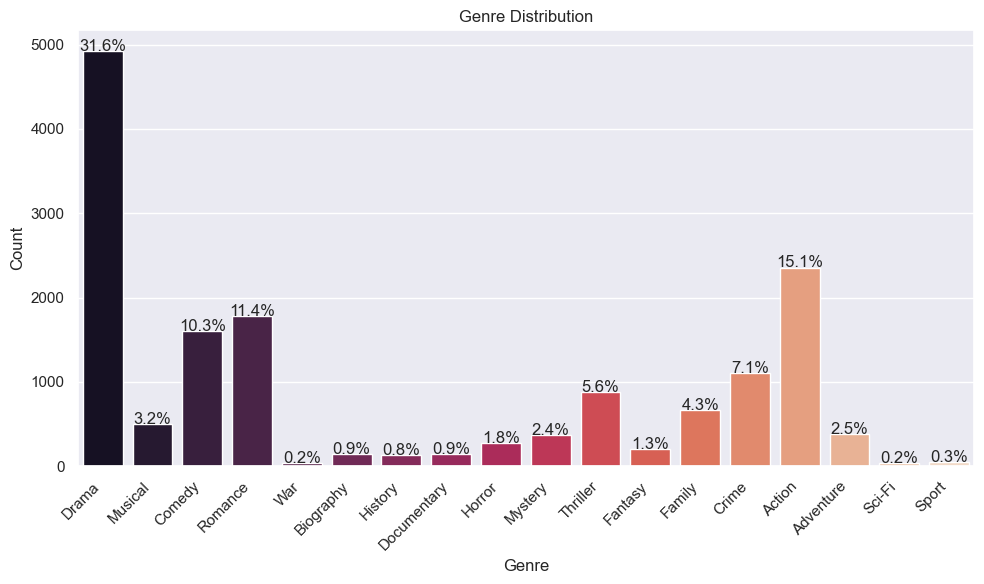

In [83]:
words_list = ['Drama', 'Musical', 'Comedy', 'Romance', 'War', 'Biography', 'History', 'Documentary', 'Horror', 'Mystery', 'Thriller', 'Fantasy', 'Family', 'Crime', 'Action', 'Adventure', 'Sci-Fi', 'Sport']

unique_value_counts = {word: 0 for word in words_list}

for row_index in range(len(df)):
    
    row_text = df['Genre'].iloc[row_index] 
    

    if not pd.isnull(row_text):

        split_values = [value.strip() for value in row_text.split(',')]
        for value in split_values:
            if value in unique_value_counts:
                unique_value_counts[value] += 1

total_count = sum(unique_value_counts.values())

percentages = {word: (count / total_count) * 100 for word, count in unique_value_counts.items()}


plt.figure(figsize=(10, 6))
sns.barplot(x=list(unique_value_counts.keys()), y=list(unique_value_counts.values()), palette='rocket')
plt.title('Genre Distribution')
plt.xlabel("Genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')

for i, value in enumerate(unique_value_counts.values()):
    plt.text(i, value + 0.5, f"{percentages[list(unique_value_counts.keys())[i]]:.1f}%", ha='center')

plt.tight_layout()
plt.show()


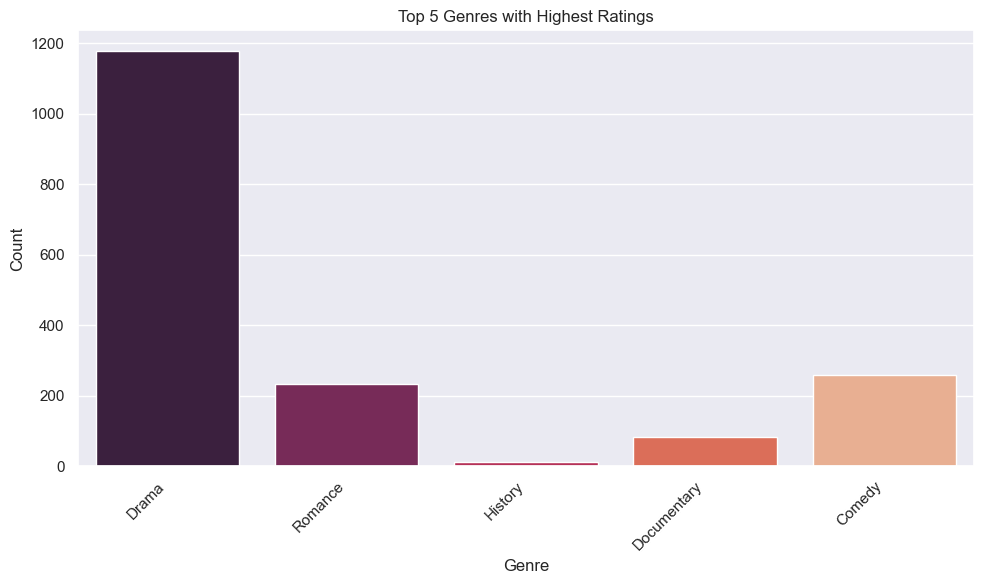

In [114]:
genre_ratings = {}
for genre in words_list:
    genre_ratings[genre] = df.loc[df['Genre'].str.contains(genre, na=False), 'Rating'].max()

top_5_genres = sorted(genre_ratings, key=genre_ratings.get, reverse=True)[:5]

df_top_5 = df[df['Genre'].apply(lambda x: any(str(genre) in str(x) for genre in top_5_genres))]
plt.figure(figsize=(10, 6))
sns.countplot(data=df_top_5, x='Genre', order=top_5_genres, palette='rocket')
plt.title('Top 5 Genres with Highest Ratings')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()


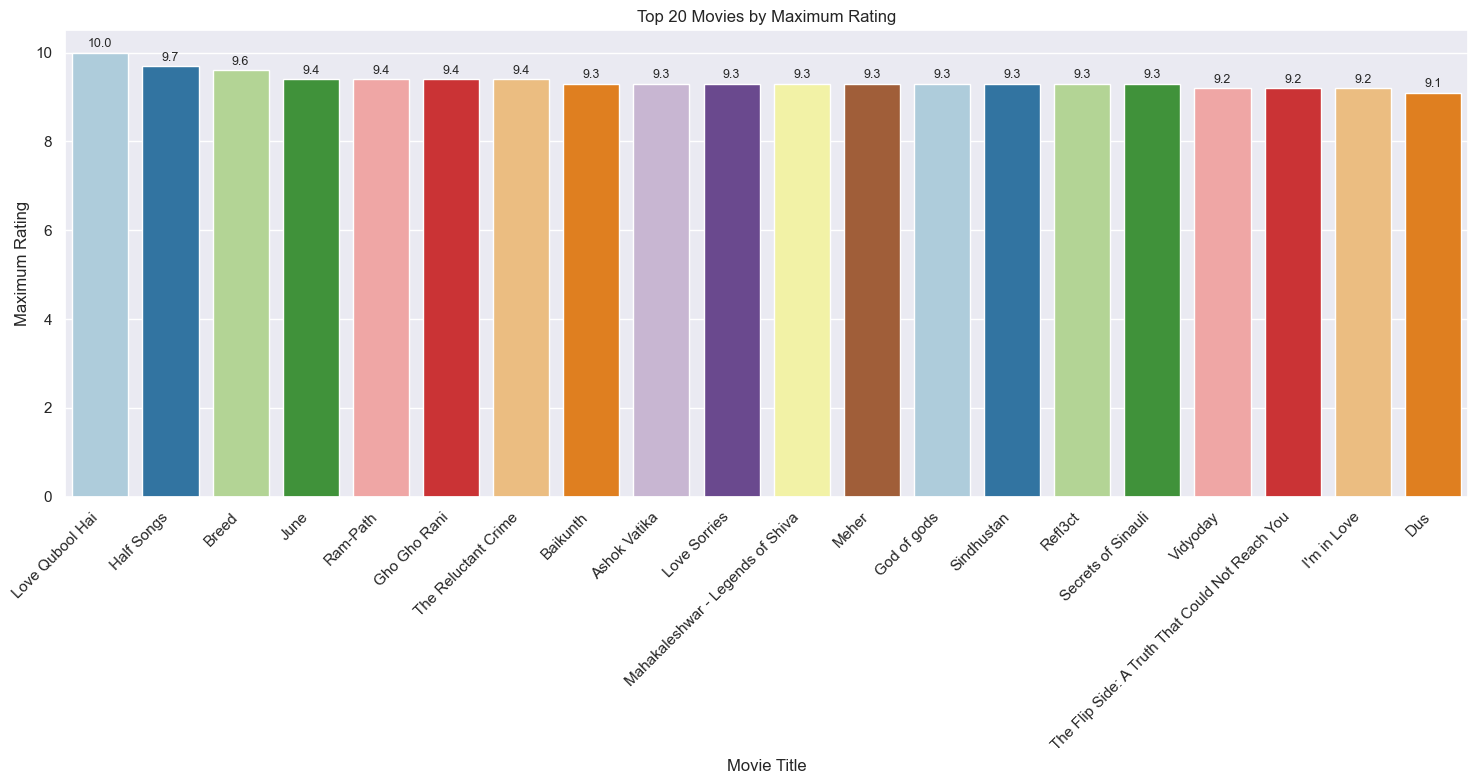

In [110]:
top_10_movies = df.groupby('Name')['Rating'].max().sort_values(ascending=False).head(20)
plt.figure(figsize=[15, 8])  
palette = sns.color_palette("Paired", len(top_10_movies)) 
fig = sns.barplot(x=top_10_movies.index, y=top_10_movies.values, palette=palette)

fig.set_xlabel('Movie Title')
fig.set_ylabel('Maximum Rating')
fig.set_title('Top 20 Movies by Maximum Rating')

for index, value in enumerate(top_10_movies.values):
    plt.text(index, value + 0.05, str(value), ha='center', va='bottom', fontsize=9)
fig.set_xticklabels(fig.get_xticklabels(), rotation=45, ha='right')
plt.tight_layout()
plt.show()

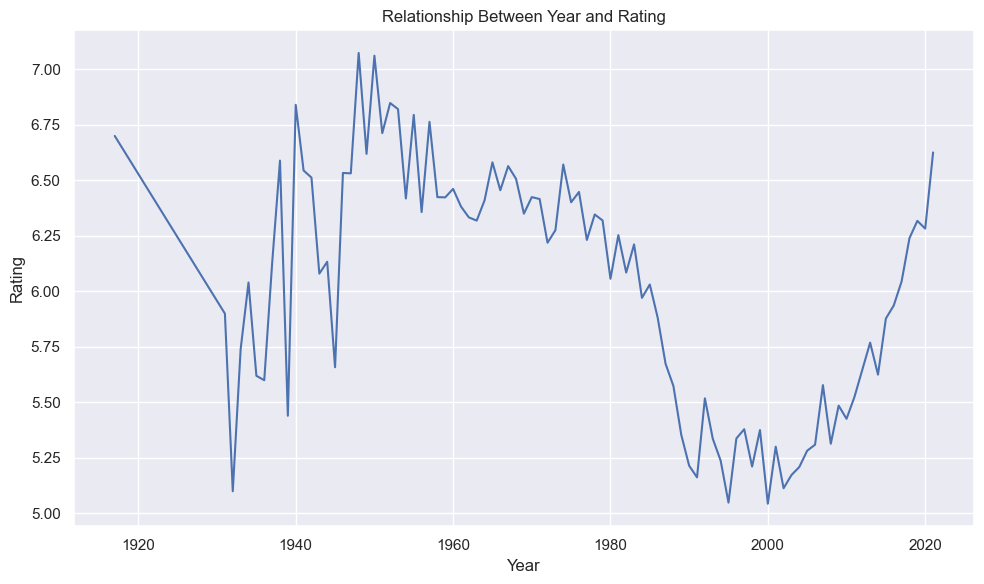

In [131]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Rating',ci=None)
plt.title('Relationship Between Year and Rating')
plt.xlabel('Year')
plt.ylabel('Rating')

# Show the plot
plt.tight_layout()
plt.show()


In [132]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']], ignore_index=True)

actor_ratings = pd.DataFrame({'Actor': actors, 'Rating': df['Rating']})

actor_average_rating = actor_ratings.groupby('Actor')['Rating'].mean()

df['Avg_Rating_by_Actor'] = df['Actor 1'].map(actor_average_rating)
df['Avg_Rating_by_Actor']=df['Avg_Rating_by_Actor'].apply(lambda x : round(x,2))

In [133]:
df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration in min,Avg_Rating_by_Actor
1,#Gadhvi (He thought he was Gandhi),2019,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109,5.83
3,#Yaaram,2019,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110,7.00
5,...Aur Pyaar Ho Gaya,1997,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147,5.98
6,...Yahaan,2005,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142,6.02
8,?: A Question Mark,2012,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,82,NaN


In [134]:
df.drop(['Actor 1','Actor 2','Actor 3','Name'] , axis =1 , inplace=True)

In [136]:
df['Avg_Rating_by_Actor'].fillna(df['Avg_Rating_by_Actor'].median(), inplace=True)

In [137]:
df.isna().sum()

Year                     0
Genre                  101
Rating                   0
Votes                    0
Director                 5
Duration in min          0
Avg_Rating_by_Actor      0
dtype: int64

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7915 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7915 non-null   int32  
 1   Genre                7814 non-null   object 
 2   Rating               7915 non-null   float64
 3   Votes                7915 non-null   object 
 4   Director             7910 non-null   object 
 5   Duration in min      7915 non-null   object 
 6   Avg_Rating_by_Actor  7915 non-null   float64
dtypes: float64(2), int32(1), object(4)
memory usage: 721.8+ KB


In [139]:
df['Votes'] = df['Votes'].str.replace(',', '').astype(float)

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7915 entries, 1 to 15508
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 7915 non-null   int32  
 1   Genre                7814 non-null   object 
 2   Rating               7915 non-null   float64
 3   Votes                7915 non-null   float64
 4   Director             7910 non-null   object 
 5   Duration in min      7915 non-null   object 
 6   Avg_Rating_by_Actor  7915 non-null   float64
dtypes: float64(3), int32(1), object(3)
memory usage: 721.8+ KB


In [141]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['Director','Genre']
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])


In [142]:
df['Duration in min']

1        109
3        110
5        147
6        142
8         82
        ... 
15501    120
15503    125
15504    120
15505    129
15508    130
Name: Duration in min, Length: 7915, dtype: object

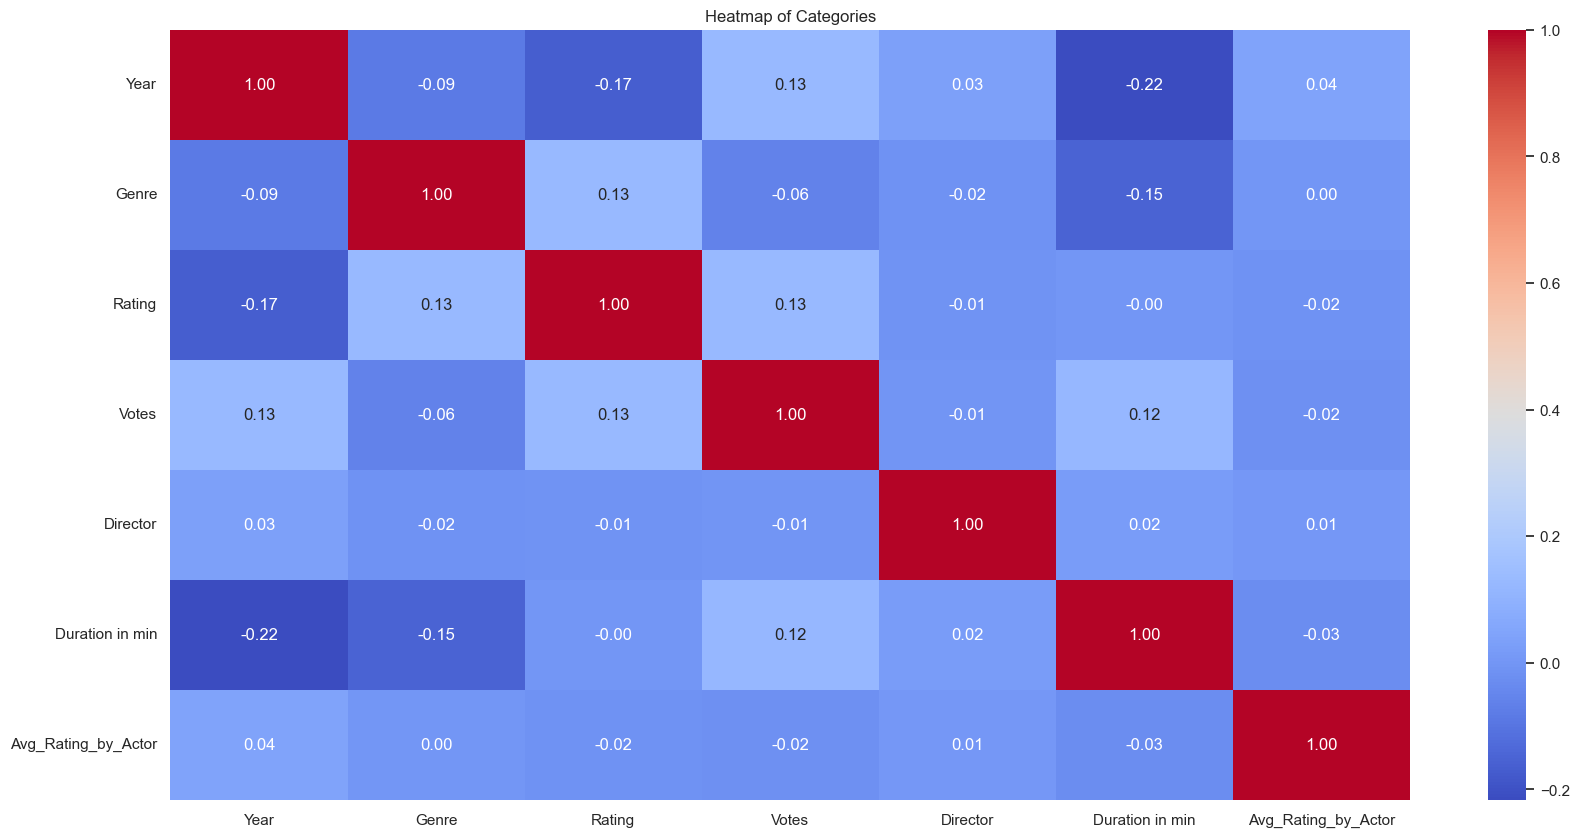

In [143]:
plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Heatmap of Categories')
plt.show()

In [145]:
df.head()

,Year,Genre,Rating,Votes,Director,Duration in min,Avg_Rating_by_Actor
1,2019,268,7.0,8.0,811,109,5.83
3,2019,207,4.4,35.0,1749,110,7.00
5,1997,177,4.7,827.0,2004,147,5.98
6,2005,331,7.4,1086.0,2642,142,6.02
8,2012,367,5.6,326.0,174,82,5.84


# ***Models***

In [146]:
from sklearn.model_selection import train_test_split
x = df.drop('Rating',axis =1)
y = df['Rating']
x_train,x_test,y_train,y_test = train_test_split(x , y , test_size=0.2 , random_state=42)

In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [155]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge,Lasso

from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor

from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error ,r2_score , explained_variance_score , mean_absolute_error ,median_absolute_error

In [156]:
models = {
    'ridge' : Ridge(),
    'Lasso' : Lasso(),
    'Cat': CatBoostRegressor(verbose=False),
    'Random Forest': RandomForestRegressor(verbose=False),
    'XGB':xgb.XGBRegressor(verbose=0),
    "LRG": LinearRegression(),
    #"SVC":SVR(),
    "DTC":DecisionTreeRegressor(),
    "GBC":GradientBoostingRegressor(),
    "KNN":KNeighborsRegressor(),
    "MLPC":MLPRegressor(),
    "ABC":AdaBoostRegressor(),
}


Model: ridge
--------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 1.3708991494339497
--------------------------------------------------------------------------------
Model: Lasso
--------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 1.3499101720291118
--------------------------------------------------------------------------------
Model: Cat
--------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 1.0565443504462853
--------------------------------------------------------------------------------
Model: Random Forest
--------------------------------------------------------------------------------
Root Mean Squared Error (RMSE): 1.088816396212894
--------------------------------------------------------------------------------
Model: XGB
--------------------------------------------------------------------------------

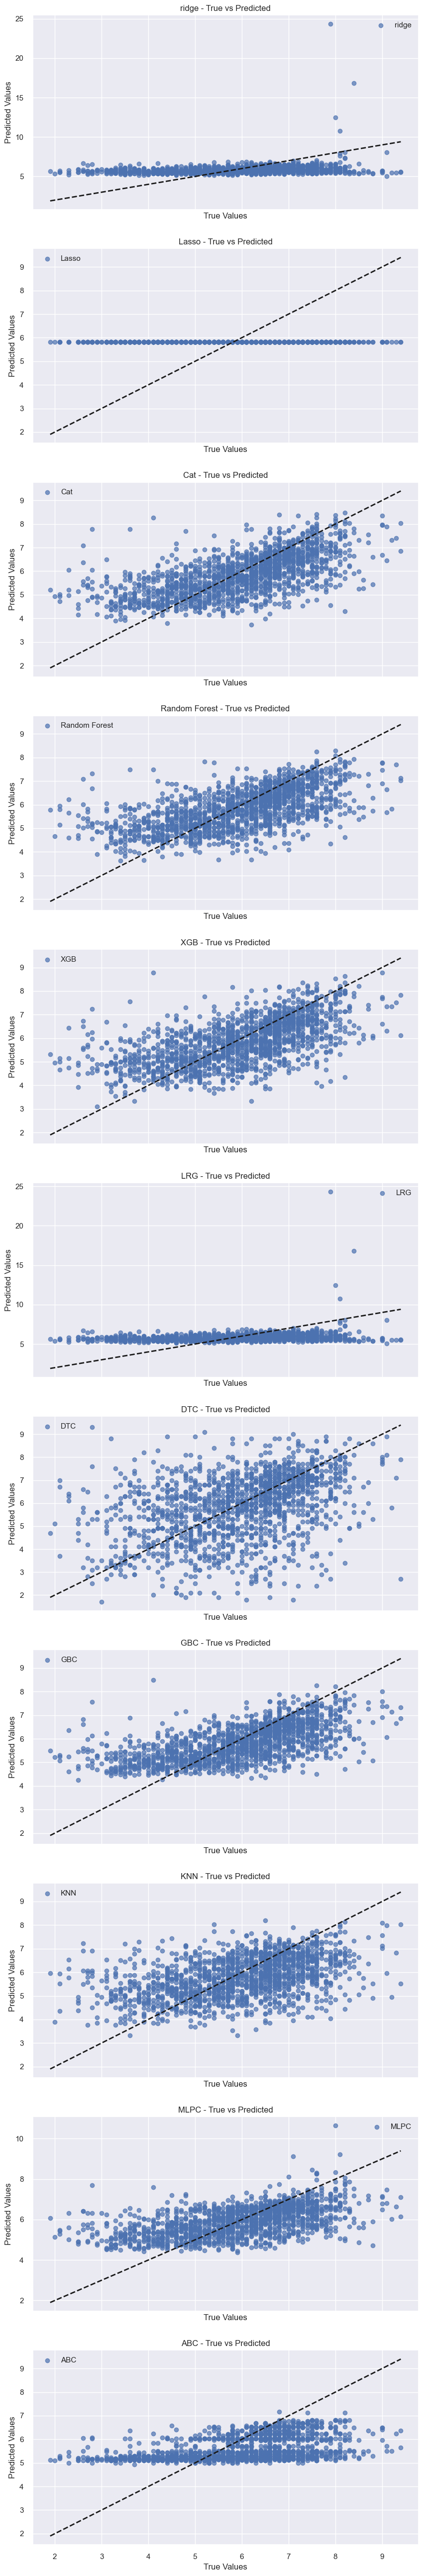

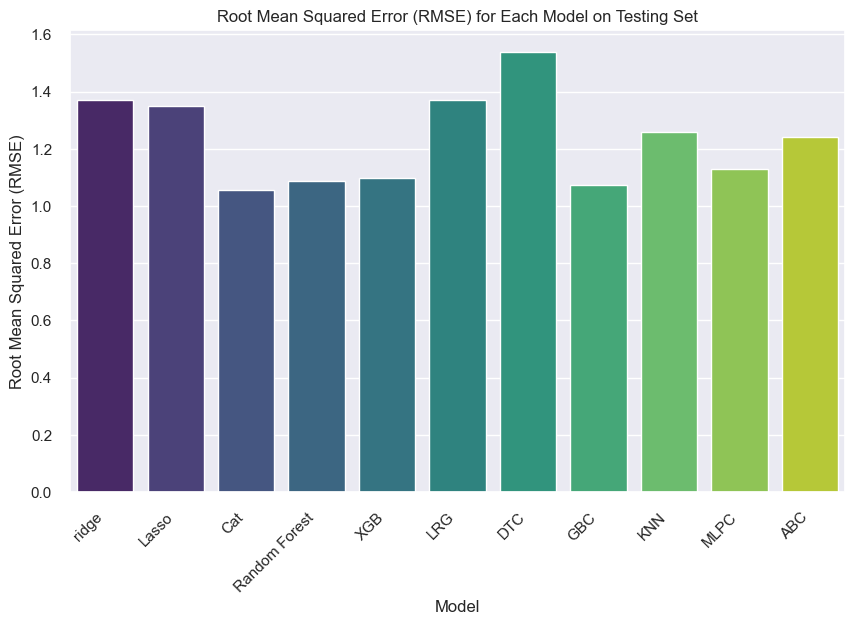

In [166]:
fig, axs = plt.subplots(len(models), 1, figsize=(10, 6*len(models)), sharex=True)
rmse_scores = []

for i, (name, model) in enumerate(models.items()):
    print(f"Model: {name}")
    print('-' * 80)
    model.fit(x_train, y_train)  
    y_pred_test = model.predict(x_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_scores.append(rmse)  
    
    print("Root Mean Squared Error (RMSE):", rmse)
    print('-' * 80)

    axs[i].scatter(y_test, y_pred_test, label=f'{name}', alpha=0.7)
    axs[i].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Add a diagonal line for reference
    axs[i].set_title(f'{name} - True vs Predicted')
    axs[i].set_xlabel('True Values')
    axs[i].set_ylabel('Predicted Values')
    axs[i].legend()

# Plot RMSE for each model
plt.figure(figsize=(10, 6))
sns.barplot(x=list(models.keys()), y=rmse_scores, palette='viridis')
plt.xlabel('Model')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.title('Root Mean Squared Error (RMSE) for Each Model on Testing Set')
plt.xticks(rotation=45, ha='right')
plt.show()
